# Estandarización

La estandarización de datos, es el proceso de ajustar ciertas características para que los datos de una muestra o población se asemejen a un tipo o modelo común con el objetivo de que su tratamiento, acceso y uso sea más sencillo para los usuarios o personas que dispongan de ellos.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler

## Estandarización Z

$X_{std} = \frac{x-\mu}{\sigma}$

Donde:

$\mu =$ media de los datos

$\sigma =$ desviación estándar de los datos

Convierte los datos para que tengan una media de 0 y una desviación estándar de 1.
Útil cuando se asume una distribución normal y cuando las magnitudes originales no son críticas.

In [2]:
# Simularemos variables normales de media 50 y desviación estándar de 3.5
np.random.seed(36)


sample_normal = np.random.normal(loc=50,scale=3.5,size=(200,2))

mean_sample_normal = np.mean(sample_normal,axis=0)
std_sample_normal = np.std(sample_normal,axis=0)


print(f"Los primeros 10 registros son:\n {sample_normal[0:10]}")
print(f"El promedio de los datos para las columnas son:{mean_sample_normal} ")
print(f"La desviación estándar de los datos para las columnas son:{std_sample_normal} ")

# Estandarizando datos normalmente (media 0 y desviación estándar 1)
standar_sample_normal = (sample_normal - mean_sample_normal)/std_sample_normal

print(f"Los primeros 10 registros estandarizados son:\n {standar_sample_normal[0:10]}")

Los primeros 10 registros son:
 [[52.36744643 55.32384715]
 [48.20843314 54.02568122]
 [47.93249118 47.30932162]
 [48.82746792 50.32549805]
 [45.17856411 50.79770938]
 [47.9344238  45.46071038]
 [44.40679422 48.95906846]
 [44.91954718 49.30048373]
 [48.0653903  56.85460919]
 [44.03308132 53.19700163]]
El promedio de los datos para las columnas son:[49.79053565 50.0960064 ] 
La desviación estándar de los datos para las columnas son:[3.42043143 3.70315227] 
Los primeros 10 registros estandarizados son:
 [[ 0.75338765  1.41172719]
 [-0.46254472  1.0611702 ]
 [-0.54321933 -0.75251693]
 [-0.28156323  0.06197197]
 [-1.34835959  0.18948802]
 [-0.54265431 -1.25171629]
 [-1.57399484 -0.30701896]
 [-1.42408599 -0.21482311]
 [-0.50436484  1.82509449]
 [-1.68325384  0.83739339]]


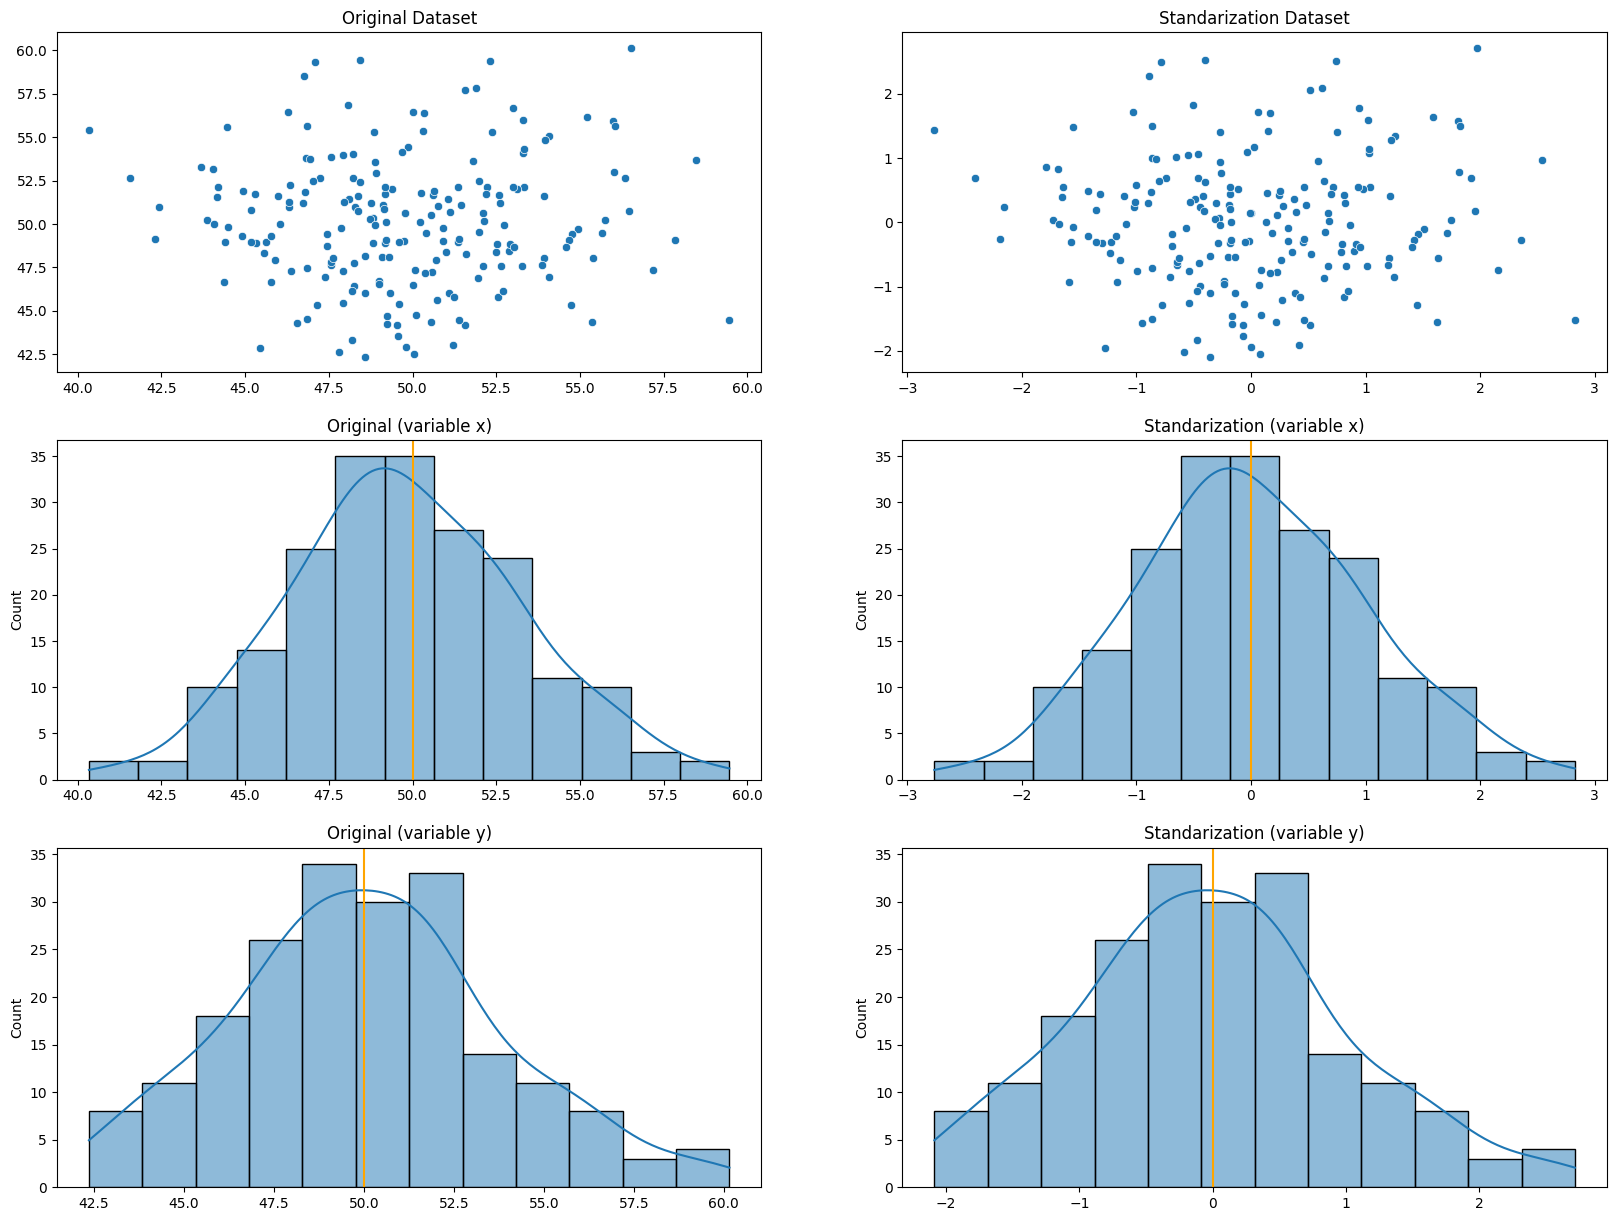

In [3]:
fig, axs = plt.subplots(ncols=2,nrows=3,figsize=(20, 15))

sns.scatterplot(x=sample_normal[:,0],y=sample_normal[:,1], ax=axs[0,0]).set(title="Original Dataset")
sns.scatterplot(x=standar_sample_normal[:,0],y=standar_sample_normal[:,1], ax=axs[0,1]).set(title="Standarization Dataset")

sns.histplot(x=sample_normal[:,0], kde=True, ax=axs[1,0]).set(title="Original (variable x)")
axs[1,0].axvline(50,c="orange")
sns.histplot(x=standar_sample_normal[:,0], kde=True, ax=axs[1,1]).set(title="Standarization (variable x)")
axs[1,1].axvline(0,c="orange") # La media de datos normalizada es 0 por defecto

sns.histplot(x=sample_normal[:,1], kde=True, ax=axs[2,0]).set(title="Original (variable y)")
axs[2,0].axvline(50,c="orange")
sns.histplot(x=standar_sample_normal[:,1], kde=True, ax=axs[2,1]).set(title="Standarization (variable y)")
axs[2,1].axvline(0,c="orange") # La media de datos normalizada es 0 por defecto

Usando la libreria ScikitLearn

In [4]:
scaler_normal = StandardScaler().fit(sample_normal)
scaler_normal_adjust = scaler_normal.transform(sample_normal) # Realmente puede ir en una sola linea
print(f"Media usando ScikitLearn: {scaler_normal.mean_}")
print(f"Desviación estándar usando ScikitLearn: {scaler_normal.scale_}")

print(f"Los primeros 10 registros estandarizados manualmente son:\n {standar_sample_normal[0:10]}")
print(f"Los primeros 10 registros estandarizados con ScikitLearn son:\n {scaler_normal_adjust[0:10]}")

Media usando ScikitLearn: [49.79053565 50.0960064 ]
Desviación estándar usando ScikitLearn: [3.42043143 3.70315227]
Los primeros 10 registros estandarizados manualmente son:
 [[ 0.75338765  1.41172719]
 [-0.46254472  1.0611702 ]
 [-0.54321933 -0.75251693]
 [-0.28156323  0.06197197]
 [-1.34835959  0.18948802]
 [-0.54265431 -1.25171629]
 [-1.57399484 -0.30701896]
 [-1.42408599 -0.21482311]
 [-0.50436484  1.82509449]
 [-1.68325384  0.83739339]]
Los primeros 10 registros estandarizados con ScikitLearn son:
 [[ 0.75338765  1.41172719]
 [-0.46254472  1.0611702 ]
 [-0.54321933 -0.75251693]
 [-0.28156323  0.06197197]
 [-1.34835959  0.18948802]
 [-0.54265431 -1.25171629]
 [-1.57399484 -0.30701896]
 [-1.42408599 -0.21482311]
 [-0.50436484  1.82509449]
 [-1.68325384  0.83739339]]


## Estandarización Min-Max-Scalling

$X_{norm} = \frac{X-min(X)}{max(X)-min{X}}$

Donde

$X =$ Es la variable a normalizar

$min(X) =$ Es el valor mínimo del conjunto

$max(X) =$ Es el valor máximo del conjunto


Escala todas las variables para que estén en el rango [0, 1]. Es útil cuando se necesita mantener la interpretación de las magnitudes originales.

In [5]:
sample_int = np.random.randint(low=55, high=10000, size=(300, 2))

max_int = np.max(sample_int,axis=0)
min_int = np.min(sample_int,axis=0)

print(f"Los primeros 10 registros son:\n {sample_int[0:10]}")
print(f"Los valores máximos de las columnas son:{max_int} ")
print(f"Los valores mínimos de las columnas son:{min_int} ")

# Estandarizando datos con Min-Max
standar_sample_int = (sample_int - min_int)/(max_int - min_int)

print(f"Los primeros 10 registros estandarizados son:\n {standar_sample_int[0:10]}")

Los primeros 10 registros son:
 [[9253 4375]
 [4711 8640]
 [4026 6534]
 [1147 8902]
 [5593 7195]
 [8100 3684]
 [4369 2828]
 [8331 1143]
 [4979 9506]
 [6271 4543]]
Los valores máximos de las columnas son:[9983 9998] 
Los valores mínimos de las columnas son:[147  88] 
Los primeros 10 registros estandarizados son:
 [[0.92578284 0.43259334]
 [0.46400976 0.8629667 ]
 [0.39436763 0.65045409]
 [0.10166734 0.88940464]
 [0.55368036 0.71715439]
 [0.80856039 0.36286579]
 [0.42923953 0.2764884 ]
 [0.83204555 0.10645812]
 [0.49125661 0.95035318]
 [0.62261082 0.44954591]]


[Text(0.5, 1.0, 'Standarization (variable y)')]

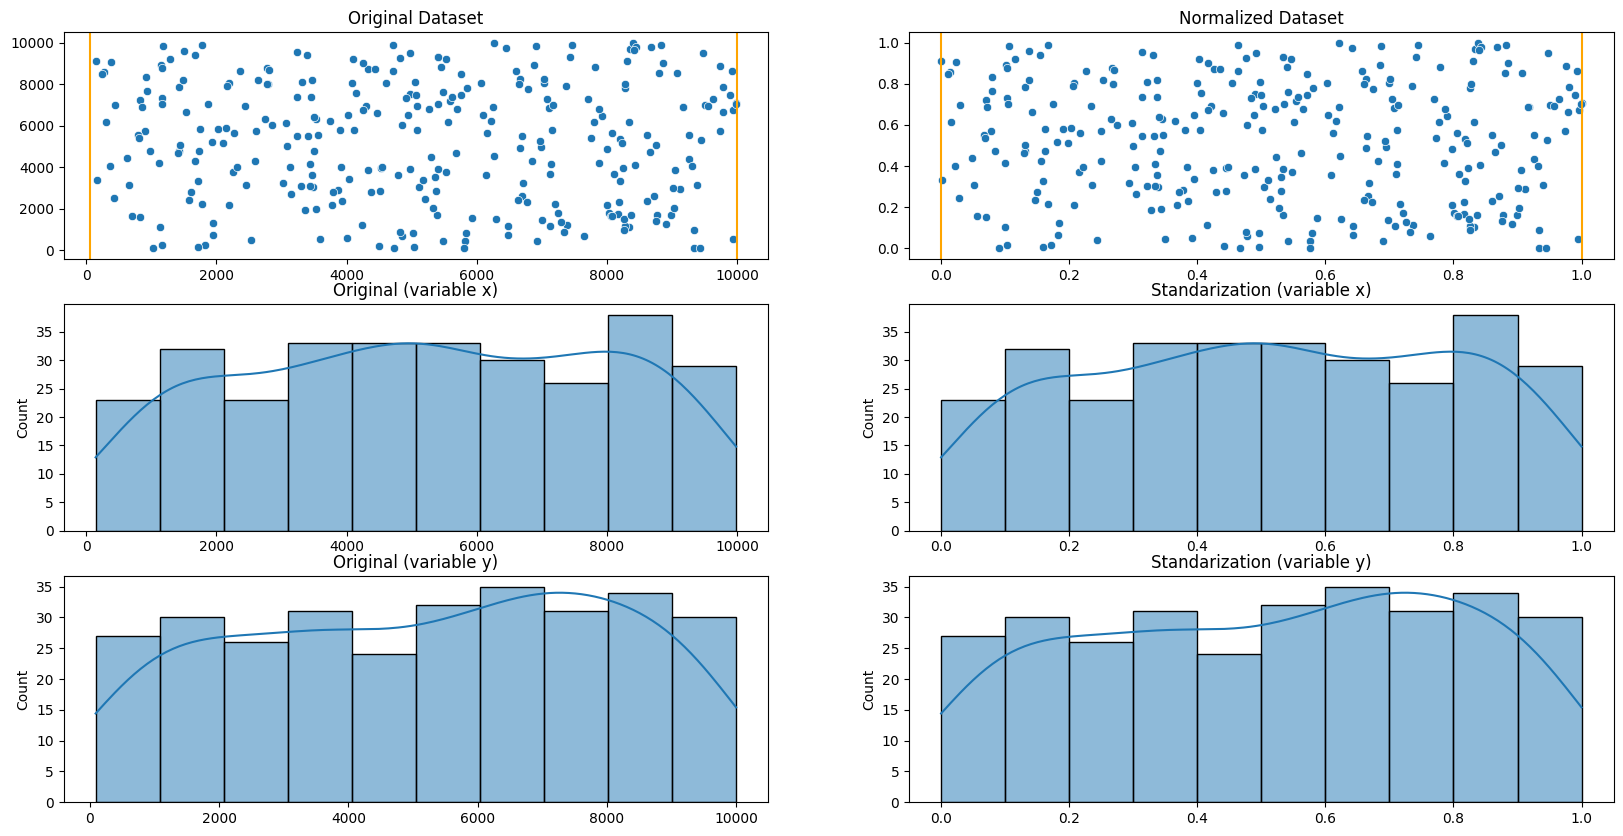

In [6]:
fig, axs = plt.subplots(ncols=2,nrows=3,figsize=(20, 10))

sns.scatterplot(x=sample_int[:,0],y=sample_int[:,1], ax=axs[0,0]).set(title="Original Dataset")
axs[0,0].axvline(55,c="orange")
axs[0,0].axvline(10000,c="orange")

sns.scatterplot(x=standar_sample_int[:,0],y=standar_sample_int[:,1], ax=axs[0,1]).set(title="Normalized Dataset")
axs[0,1].axvline(0,c="orange")
axs[0,1].axvline(1,c="orange")

sns.histplot(x=sample_int[:,0], kde=True, ax=axs[1,0]).set(title="Original (variable x)")
sns.histplot(x=standar_sample_int[:,0], kde=True, ax=axs[1,1]).set(title="Standarization (variable x)")

sns.histplot(x=sample_int[:,1], kde=True, ax=axs[2,0]).set(title="Original (variable y)")
sns.histplot(x=standar_sample_int[:,1], kde=True, ax=axs[2,1]).set(title="Standarization (variable y)")

In [7]:
scaler_min_max = MinMaxScaler().fit_transform(sample_int)

print(f"Los primeros 10 registros estandarizados manualmente son:\n {standar_sample_int[0:10]}")
print(f"Los primeros 10 registros estandarizados con ScikitLearn son:\n {scaler_min_max[0:10]}")

Los primeros 10 registros estandarizados manualmente son:
 [[0.92578284 0.43259334]
 [0.46400976 0.8629667 ]
 [0.39436763 0.65045409]
 [0.10166734 0.88940464]
 [0.55368036 0.71715439]
 [0.80856039 0.36286579]
 [0.42923953 0.2764884 ]
 [0.83204555 0.10645812]
 [0.49125661 0.95035318]
 [0.62261082 0.44954591]]
Los primeros 10 registros estandarizados con ScikitLearn son:
 [[0.92578284 0.43259334]
 [0.46400976 0.8629667 ]
 [0.39436763 0.65045409]
 [0.10166734 0.88940464]
 [0.55368036 0.71715439]
 [0.80856039 0.36286579]
 [0.42923953 0.2764884 ]
 [0.83204555 0.10645812]
 [0.49125661 0.95035318]
 [0.62261082 0.44954591]]
